In [1]:
import pandas as pd
import numpy as np
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [2]:
#access AWS S3 data
role = get_execution_role()
bucket='defibanking'
data_key = 'XBTUSD_BitMEX_funding.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
data_funding = pd.read_csv(data_location)

In [3]:
data_funding.shape

(3185, 3)

In [4]:
data_funding.head(10)

,timestamp,symbol,funding
0,2017-01-01 04:00:00,XBTUSD,0.1000
1,2017-01-01 12:00:00,XBTUSD,0.0982
2,2017-01-01 20:00:00,XBTUSD,0.1365
3,2017-01-02 04:00:00,XBTUSD,0.2787
4,2017-01-02 12:00:00,XBTUSD,0.0829
5,2017-01-02 20:00:00,XBTUSD,0.2059
6,2017-01-03 04:00:00,XBTUSD,0.0295
7,2017-01-03 12:00:00,XBTUSD,0.3163
8,2017-01-03 20:00:00,XBTUSD,0.0598
9,2017-01-04 04:00:00,XBTUSD,-0.0506


In [5]:
data_funding.describe()

,funding
count,3185.000000
mean,0.008064
std,0.116548
min,-0.375000
25%,-0.024900
50%,0.010000
75%,0.015600
max,0.375000


In [6]:
#access s3 data
role = get_execution_role()
bucket='defibanking'
data_key2 = 'XBTUSD_BitMEX_8H.csv'
data_location2 = 's3://{}/{}'.format(bucket, data_key2)
data_8H = pd.read_csv(data_location2)
data_8H.shape

(3185, 6)

In [7]:
data_8H.shape

(3185, 6)

In [8]:
data_8H.head(10)

,timestamp,open,high,low,close,volume
0,2017-01-01 00:00:00,968.29,968.86,960.90,967.50,2455959
1,2017-01-01 08:00:00,967.50,981.75,965.43,981.75,4425787
2,2017-01-01 16:00:00,981.75,1009.87,981.07,1002.16,13400608
3,2017-01-02 00:00:00,1002.16,1022.54,996.54,1022.54,8754585
4,2017-01-02 08:00:00,1022.54,1033.00,997.35,1028.01,13713178
5,2017-01-02 16:00:00,1028.01,1035.00,1003.73,1022.76,14555458
6,2017-01-03 00:00:00,1022.76,1037.26,1015.00,1020.97,7813608
7,2017-01-03 08:00:00,1020.97,1030.00,1003.00,1019.95,7566001
8,2017-01-03 16:00:00,1019.95,1040.66,1018.11,1036.90,6142995
9,2017-01-04 00:00:00,1036.90,1070.00,1036.49,1065.74,8791991


In [9]:
data_8H.describe()

,open,high,low,close,volume
count,3185.000000,3185.000000,3185.000000,3185.000000,3.185000e+03
mean,6252.795394,6371.030515,6117.955149,6254.555900,5.813796e+08
std,3555.752807,3648.301829,3438.725765,3554.264594,6.010662e+08
min,744.110000,779.580000,724.000000,744.110000,4.515610e+05
25%,3601.500000,3638.500000,3561.500000,3602.800000,9.626843e+07
50%,6384.000000,6432.000000,6316.500000,6384.500000,4.413138e+08
75%,8471.000000,8632.000000,8320.000000,8471.000000,8.372346e+08
max,19868.000000,20093.000000,19234.000000,19868.000000,5.980463e+09


In [10]:
#aggregate needed data
data_8H['funding'] = data_funding['funding']

In [11]:
data_8H.head(5)

,timestamp,open,high,low,close,volume,funding
0,2017-01-01 00:00:00,968.29,968.86,960.90,967.50,2455959,0.1000
1,2017-01-01 08:00:00,967.50,981.75,965.43,981.75,4425787,0.0982
2,2017-01-01 16:00:00,981.75,1009.87,981.07,1002.16,13400608,0.1365
3,2017-01-02 00:00:00,1002.16,1022.54,996.54,1022.54,8754585,0.2787
4,2017-01-02 08:00:00,1022.54,1033.00,997.35,1028.01,13713178,0.0829


In [12]:
data_8H.describe()

,open,high,low,close,volume,funding
count,3185.000000,3185.000000,3185.000000,3185.000000,3.185000e+03,3185.000000
mean,6252.795394,6371.030515,6117.955149,6254.555900,5.813796e+08,0.008064
std,3555.752807,3648.301829,3438.725765,3554.264594,6.010662e+08,0.116548
min,744.110000,779.580000,724.000000,744.110000,4.515610e+05,-0.375000
25%,3601.500000,3638.500000,3561.500000,3602.800000,9.626843e+07,-0.024900
50%,6384.000000,6432.000000,6316.500000,6384.500000,4.413138e+08,0.010000
75%,8471.000000,8632.000000,8320.000000,8471.000000,8.372346e+08,0.015600
max,19868.000000,20093.000000,19234.000000,19868.000000,5.980463e+09,0.375000


In [13]:
#correlation matrix
corr = data_8H.corr()
corr.style.background_gradient(cmap='viridis').set_precision(6)

,open,high,low,close,volume,funding
open,1,0.998898,0.998173,0.998107,0.516064,0.150339
high,0.998898,1,0.997585,0.999109,0.521055,0.147431
low,0.998173,0.997585,1,0.998752,0.507701,0.150671
close,0.998107,0.999109,0.998752,1,0.5131,0.149072
volume,0.516064,0.521055,0.507701,0.5131,1,-0.000330475
funding,0.150339,0.147431,0.150671,0.149072,-0.000330475,1


In [14]:
data_8H = data_8H.drop(columns ='timestamp')

In [15]:
diff_data = data_8H.copy()

In [16]:
#further correlation check
diff_data['change_between_openToClose'] = diff_data['close'] - diff_data['open']
diff_data['variation_lowToHigh'] = diff_data['high'] - diff_data['low']

In [17]:
diff_data.head(5)

,open,high,low,close,volume,funding,change_between_openToClose,variation_lowToHigh
0,968.29,968.86,960.90,967.50,2455959,0.1000,-0.79,7.96
1,967.50,981.75,965.43,981.75,4425787,0.0982,14.25,16.32
2,981.75,1009.87,981.07,1002.16,13400608,0.1365,20.41,28.80
3,1002.16,1022.54,996.54,1022.54,8754585,0.2787,20.38,26.00
4,1022.54,1033.00,997.35,1028.01,13713178,0.0829,5.47,35.65


In [18]:
corr = diff_data.corr()
corr.style.background_gradient(cmap='viridis').set_precision(6)

,open,high,low,close,volume,funding,change_between_openToClose,variation_lowToHigh
open,1,0.998898,0.998173,0.998107,0.516064,0.150339,-0.037564,0.655272
high,0.998898,1,0.997585,0.999109,0.521055,0.147431,-0.00335893,0.673962
low,0.998173,0.997585,1,0.998752,0.507701,0.150671,0.00262114,0.621025
close,0.998107,0.999109,0.998752,1,0.5131,0.149072,0.0239715,0.651497
volume,0.516064,0.521055,0.507701,0.5131,1,-0.000330475,-0.0516691,0.479834
funding,0.150339,0.147431,0.150671,0.149072,-0.000330475,1,-0.0216067,0.0611076
change_between_openToClose,-0.037564,-0.00335893,0.00262114,0.0239715,-0.0516691,-0.0216067,1,-0.065787
variation_lowToHigh,0.655272,0.673962,0.621025,0.651497,0.479834,0.0611076,-0.065787,1


In [19]:
#data preparation for ML
final_data = data_funding.copy()

In [20]:
final_data = final_data.drop(columns= ['symbol','funding'])

In [21]:
final_data['close'] = data_8H['close']
final_data['volume'] = data_8H['volume']
final_data['funding'] = data_8H['funding']

In [22]:
final_data.head(5)

,timestamp,close,volume,funding
0,2017-01-01 04:00:00,967.50,2455959,0.1000
1,2017-01-01 12:00:00,981.75,4425787,0.0982
2,2017-01-01 20:00:00,1002.16,13400608,0.1365
3,2017-01-02 04:00:00,1022.54,8754585,0.2787
4,2017-01-02 12:00:00,1028.01,13713178,0.0829


In [23]:
final_data = final_data.set_index('timestamp')

In [24]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 


Using TensorFlow backend.


In [25]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [26]:
# load dataset
dataset = final_data.copy()
values = dataset.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.011681   0.000335   0.633333  0.012426
2   0.012426   0.000665   0.630933  0.013494
3   0.013494   0.002165   0.682000  0.014559
4   0.014559   0.001388   0.871600  0.014845
5   0.014845   0.002218   0.610533  0.014571


(1825, 1, 3) (1825,) (1359, 1, 3) (1359,)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1825 samples, validate on 1359 samples
Epoch 1/30
 - 2s - loss: 0.2184 - val_loss: 0.1980
Epoch 2/30
 - 0s - loss: 0.1772 - val_loss: 0.1371
Epoch 3/30
 - 0s - loss: 0.1571 - val_loss: 0.1067
Epoch 4/30
 - 0s - loss: 0.1444 - val_loss: 0.0876
Epoch 5/30
 - 0s - loss: 0.1340 - val_loss: 0.0773
Epoch 6/30
 - 0s - loss: 0.1289 - val_loss: 0.0717
Epoch 7/30
 - 0s - loss: 0.1194 - val_loss: 0.0663
Epoch 8/30
 - 0s - loss: 0.1086 - val_loss: 0.0609
Epoch 9/30
 - 0s - loss: 0.0970 - val_loss: 0.0557
Epoch 10/30
 - 0s - loss: 0.0844 - val_loss: 0.0514
Epoch 11/30
 - 0s - loss: 0.0708 - val_loss: 0.0492
Epoch 12/30
 - 0s - loss: 0.0600 - val_loss: 0.0472
Epoch 13/30
 - 0s - loss: 0.0515 - val_loss: 0.0438
Epoch 14/30
 - 0s - loss: 0.0413 - val_loss: 0.0418
Epoch 15/30
 - 0s - loss: 0.0388 - val_loss: 0.0395
Epoch 16/30
 - 0s - loss: 0.0359 - val_

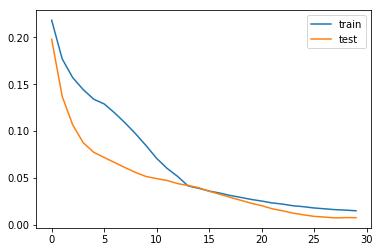

Test RMSE: 193.354


In [27]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 5
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [28]:
#validate Model
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
print('mean absolute percentage error : ',mape)

mean absolute percentage error :  2.407226897776127


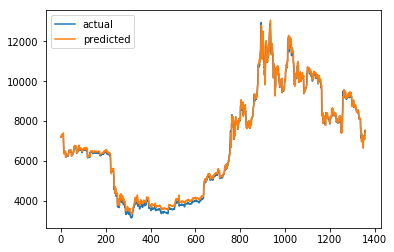

,actual,predicted
0,7196.000000,7189.874023
1,7228.000000,7216.272461
2,7218.000000,7255.625977
3,7292.500000,7216.205078
4,7247.000000,7307.835449
5,7282.500000,7269.286621
6,7260.000000,7310.891113
7,7303.500000,7282.045410
8,7371.500488,7339.202148
9,7354.500000,7374.891602


In [29]:
#visualise prediction
pyplot.plot(inv_y, label = 'actual')
pyplot.plot(inv_yhat, label = 'predicted')
pyplot.legend()
pyplot.show()

data = np.array([inv_y,inv_yhat])
data = data.T
columns = ['actual','predicted']
df = pd.DataFrame(data=data, columns =columns)

df.head(10)

In [30]:
#save to sagemaker notebook directory
df.to_csv('bitcoin_prediction.csv')

In [31]:
#save output to s3

# Create an S3 client
S3 = boto3.client('s3')

SOURCE_FILENAME = 'bitcoin_prediction.csv'
BUCKET_NAME = 'defibanking'

# Uploads the given file using a managed uploader, which will split up large
# files automatically and upload parts in parallel.
S3.upload_file(SOURCE_FILENAME, BUCKET_NAME, SOURCE_FILENAME)